# Census Data Exploration 

For this week's assignment, I am going to perform analysis on broadband adoption by household and income level. The source of the data is the 2019 American Community Survey (5-year Estimate).

To start, I will import the python libaries I am likely to use:

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

Next I will import my datasets downloaded from [censusreporter.org](https://censusreporter.org/).

In [3]:
hh_adoption = gpd.read_file('Data/acs2019_5yr_B28002_14000US06037407102.geojson')
income_adoption = gpd.read_file('Data/acs2019_5yr_B28004_14000US06037407102.geojson')

Before starting on any analysis, I will familiarize myself with the datasets. To start I will take a quick look at the shape of the files.

In [4]:
hh_adoption.shape

(2347, 29)

In [5]:
income_adoption.shape

(2347, 53)

Next, I will dig a liitle deeper with the head and tail of the data.

In [6]:
hh_adoption.head()

,geoid,name,B28002001,"B28002001, Error",B28002002,"B28002002, Error",B28002003,"B28002003, Error",B28002004,"B28002004, Error",...,"B28002009, Error",B28002010,"B28002010, Error",B28002011,"B28002011, Error",B28002012,"B28002012, Error",B28002013,"B28002013, Error",geometry
0,05000US06037,"Los Angeles County, CA",3316795.0,5782.0,2803857.0,9287.0,9210.0,704.0,2794647.0,9265.0,...,3095.0,26129.0,1113.0,5345.0,564.0,96302.0,2202.0,416636.0,5107.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,1223.0,130.0,0.0,12.0,1223.0,130.0,...,61.0,21.0,28.0,0.0,12.0,95.0,67.0,257.0,94.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,1095.0,100.0,12.0,20.0,1083.0,99.0,...,64.0,0.0,12.0,0.0,12.0,90.0,72.0,127.0,70.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,1687.0,179.0,0.0,17.0,1687.0,179.0,...,99.0,33.0,51.0,0.0,17.0,72.0,64.0,538.0,176.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,1017.0,99.0,0.0,12.0,1017.0,99.0,...,48.0,0.0,12.0,0.0,12.0,59.0,40.0,281.0,87.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [7]:
income_adoption.head()

,geoid,name,B28004001,"B28004001, Error",B28004002,"B28004002, Error",B28004003,"B28004003, Error",B28004004,"B28004004, Error",...,"B28004021, Error",B28004022,"B28004022, Error",B28004023,"B28004023, Error",B28004024,"B28004024, Error",B28004025,"B28004025, Error",geometry
0,05000US06037,"Los Angeles County, CA",3316795.0,5782.0,185622.0,3065.0,713.0,172.0,117395.0,2505.0,...,1825.0,1529409.0,7758.0,3289.0,437.0,1446065.0,8493.0,80055.0,2121.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,86.0,71.0,0.0,12.0,19.0,22.0,...,35.0,702.0,134.0,0.0,12.0,649.0,131.0,53.0,52.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,66.0,52.0,12.0,20.0,39.0,38.0,...,41.0,858.0,117.0,0.0,12.0,777.0,123.0,81.0,70.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,271.0,127.0,0.0,17.0,222.0,114.0,...,17.0,626.0,178.0,0.0,17.0,448.0,126.0,178.0,134.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,85.0,53.0,0.0,12.0,31.0,38.0,...,17.0,414.0,104.0,0.0,12.0,381.0,100.0,33.0,33.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [8]:
hh_adoption.tail()

,geoid,name,B28002001,"B28002001, Error",B28002002,"B28002002, Error",B28002003,"B28002003, Error",B28002004,"B28002004, Error",...,"B28002009, Error",B28002010,"B28002010, Error",B28002011,"B28002011, Error",B28002012,"B28002012, Error",B28002013,"B28002013, Error",geometry
2342,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,24.0,27.0,0.0,12.0,24.0,27.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2343,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",16.0,23.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,16.0,23.0,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470..."
2344,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505..."
2345,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2346,14000US06037990300,"Census Tract 9903, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.47656 33.75038, -118.4661..."


In [9]:
income_adoption.tail()

,geoid,name,B28004001,"B28004001, Error",B28004002,"B28004002, Error",B28004003,"B28004003, Error",B28004004,"B28004004, Error",...,"B28004021, Error",B28004022,"B28004022, Error",B28004023,"B28004023, Error",B28004024,"B28004024, Error",B28004025,"B28004025, Error",geometry
2342,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,9.0,7.0,0.0,12.0,9.0,7.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2343,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",16.0,23.0,16.0,23.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470..."
2344,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505..."
2345,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2346,14000US06037990300,"Census Tract 9903, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.47656 33.75038, -118.4661..."


Since Census explorer provides us with a total for the entire county, this data point is different in scale from all the others and must be removed for a more accurate analysis.

In [16]:
hh_adoption=hh_adoption.drop([0])
income_adoption=income_adoption.drop([0])

To confirm that the total for the county has been deleted, will run the head command again for both datasets.

In [17]:
hh_adoption.head(5)
income_adoption.head(5)

,geoid,name,B28004001,"B28004001, Error",B28004002,"B28004002, Error",B28004003,"B28004003, Error",B28004004,"B28004004, Error",...,"B28004021, Error",B28004022,"B28004022, Error",B28004023,"B28004023, Error",B28004024,"B28004024, Error",B28004025,"B28004025, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,86.0,71.0,0.0,12.0,19.0,22.0,...,35.0,702.0,134.0,0.0,12.0,649.0,131.0,53.0,52.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,66.0,52.0,12.0,20.0,39.0,38.0,...,41.0,858.0,117.0,0.0,12.0,777.0,123.0,81.0,70.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,271.0,127.0,0.0,17.0,222.0,114.0,...,17.0,626.0,178.0,0.0,17.0,448.0,126.0,178.0,134.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,85.0,53.0,0.0,12.0,31.0,38.0,...,17.0,414.0,104.0,0.0,12.0,381.0,100.0,33.0,33.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,78.0,50.0,0.0,12.0,35.0,27.0,...,51.0,791.0,116.0,18.0,21.0,748.0,109.0,25.0,22.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Now I will create a quick plot to begin to understand the data in a spatial context.

<AxesSubplot:>

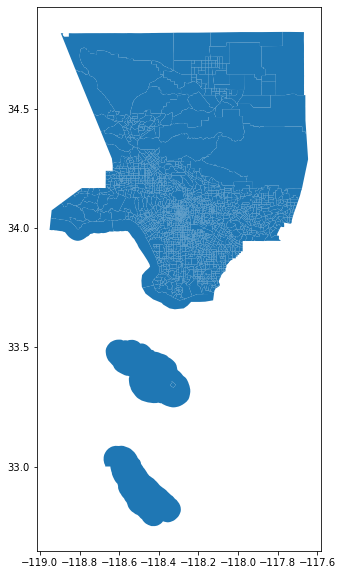

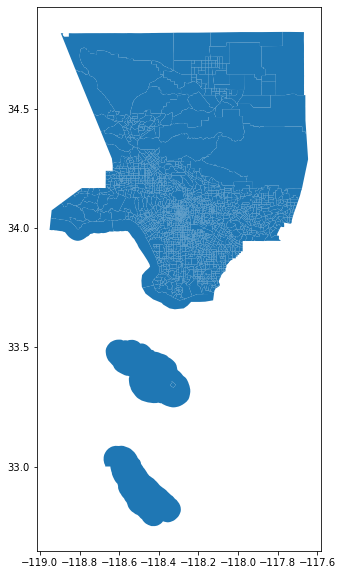

In [19]:
hh_adoption.plot(figsize=(10,10))
income_adoption.plot(figsize=(10,10))

Hmmm, these plot don't tell me much besides that the data is at the census tract level. Let's check the data type to further out understanding of the data sets.

In [20]:
hh_adoption.info()
income_adoption.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2346 entries, 1 to 2346
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2346 non-null   object  
 1   name              2346 non-null   object  
 2   B28002001         2346 non-null   float64 
 3   B28002001, Error  2346 non-null   float64 
 4   B28002002         2346 non-null   float64 
 5   B28002002, Error  2346 non-null   float64 
 6   B28002003         2346 non-null   float64 
 7   B28002003, Error  2346 non-null   float64 
 8   B28002004         2346 non-null   float64 
 9   B28002004, Error  2346 non-null   float64 
 10  B28002005         2346 non-null   float64 
 11  B28002005, Error  2346 non-null   float64 
 12  B28002006         2346 non-null   float64 
 13  B28002006, Error  2346 non-null   float64 
 14  B28002007         2346 non-null   float64 
 15  B28002007, Error  2346 non-null   float64 
 16  B28002008       

To begin to simplify and organize the data, I will delete any unnessary columns and redefine the variable. I will start with the House Hold variable then repeat the process with the income variable.

In [21]:
list(hh_adoption)

['geoid',
 'name',
 'B28002001',
 'B28002001, Error',
 'B28002002',
 'B28002002, Error',
 'B28002003',
 'B28002003, Error',
 'B28002004',
 'B28002004, Error',
 'B28002005',
 'B28002005, Error',
 'B28002006',
 'B28002006, Error',
 'B28002007',
 'B28002007, Error',
 'B28002008',
 'B28002008, Error',
 'B28002009',
 'B28002009, Error',
 'B28002010',
 'B28002010, Error',
 'B28002011',
 'B28002011, Error',
 'B28002012',
 'B28002012, Error',
 'B28002013',
 'B28002013, Error',
 'geometry']

In [23]:
hh_columns_to_keep = ['geoid',
                      'name',
                      'B28002001',
                      'B28002002',
                      'B28002003',
                      'B28002004',
                      'B28002005',
                      'B28002006',
                      'B28002007',
                      'B28002008',
                      'B28002009',
                      'B28002010',
                      'B28002011',
                      'B28002012',
                      'B28002013',
                      'geometry']

In [24]:
hh_adoption=hh_adoption[hh_columns_to_keep]

In [25]:
hh_adoption.head(5)

,geoid,name,B28002001,B28002002,B28002003,B28002004,B28002005,B28002006,B28002007,B28002008,B28002009,B28002010,B28002011,B28002012,B28002013,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,1223.0,0.0,1223.0,973.0,97.0,1045.0,218.0,108.0,21.0,0.0,95.0,257.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,1095.0,12.0,1083.0,959.0,113.0,960.0,124.0,97.0,0.0,0.0,90.0,127.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,1687.0,0.0,1687.0,1453.0,113.0,1388.0,182.0,196.0,33.0,0.0,72.0,538.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,1017.0,0.0,1017.0,868.0,142.0,848.0,131.0,44.0,0.0,0.0,59.0,281.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,1185.0,18.0,1167.0,955.0,70.0,1080.0,203.0,100.0,0.0,0.0,99.0,161.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [26]:
#since deleting columns was successful, I will now relabel them to be more functional
hh_adoption.columns=['geoid',
                      'name',
                      'Total',
                      'With an Internet subscription',
                      'Dial-up with no other type of Internet subscription',
                      'Broadband of any type',
                      'Cellular data plan',
                      'Cellular data plan with no other type of Internet subscription',
                      'Broadband such as cable, fiber optic or DSL',
                      'Broadband such as cable, fiber optic or DSL with no other type of Internet subscription',
                      'Satellite Internet service',
                      'Satellite Internet service with no other type of Internet subscription',
                      'Other service with no other type of Internet subscription',
                      'Internet access without a subscription',
                      'No Internet access',
                      'geometry']

In [27]:
#check to see if the column names have changed
hh_adoption.head(5)

,geoid,name,Total,With an Internet subscription,Dial-up with no other type of Internet subscription,Broadband of any type,Cellular data plan,Cellular data plan with no other type of Internet subscription,"Broadband such as cable, fiber optic or DSL","Broadband such as cable, fiber optic or DSL with no other type of Internet subscription",Satellite Internet service,Satellite Internet service with no other type of Internet subscription,Other service with no other type of Internet subscription,Internet access without a subscription,No Internet access,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,1223.0,0.0,1223.0,973.0,97.0,1045.0,218.0,108.0,21.0,0.0,95.0,257.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,1095.0,12.0,1083.0,959.0,113.0,960.0,124.0,97.0,0.0,0.0,90.0,127.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,1687.0,0.0,1687.0,1453.0,113.0,1388.0,182.0,196.0,33.0,0.0,72.0,538.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,1017.0,0.0,1017.0,868.0,142.0,848.0,131.0,44.0,0.0,0.0,59.0,281.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,1185.0,18.0,1167.0,955.0,70.0,1080.0,203.0,100.0,0.0,0.0,99.0,161.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Since we have manipulated the data so much, it is a good practice to confirm the itegrity of the data before conducting any further analyis

In [28]:
#generate a random record
hh_random_tract=hh_adoption.sample()
hh_random_tract

,geoid,name,Total,With an Internet subscription,Dial-up with no other type of Internet subscription,Broadband of any type,Cellular data plan,Cellular data plan with no other type of Internet subscription,"Broadband such as cable, fiber optic or DSL","Broadband such as cable, fiber optic or DSL with no other type of Internet subscription",Satellite Internet service,Satellite Internet service with no other type of Internet subscription,Other service with no other type of Internet subscription,Internet access without a subscription,No Internet access,geometry
922,14000US06037275500,"Census Tract 2755, Los Angeles, CA",1907.0,1221.0,10.0,1211.0,720.0,135.0,1051.0,433.0,100.0,0.0,0.0,184.0,502.0,"MULTIPOLYGON (((-118.42088 33.99098, -118.4203..."


We can confirm the integrity of the data by adding all the level 1 indentations (With an internet subscription + Internet Access without a subscription + No internet access) to match the total column. 
In the example above: 1221+184+502=1907

Now that we have completed the process with the household variable variable, we will follow the same steps for the income variable.

In [29]:
list(income_adoption)

['geoid',
 'name',
 'B28004001',
 'B28004001, Error',
 'B28004002',
 'B28004002, Error',
 'B28004003',
 'B28004003, Error',
 'B28004004',
 'B28004004, Error',
 'B28004005',
 'B28004005, Error',
 'B28004006',
 'B28004006, Error',
 'B28004007',
 'B28004007, Error',
 'B28004008',
 'B28004008, Error',
 'B28004009',
 'B28004009, Error',
 'B28004010',
 'B28004010, Error',
 'B28004011',
 'B28004011, Error',
 'B28004012',
 'B28004012, Error',
 'B28004013',
 'B28004013, Error',
 'B28004014',
 'B28004014, Error',
 'B28004015',
 'B28004015, Error',
 'B28004016',
 'B28004016, Error',
 'B28004017',
 'B28004017, Error',
 'B28004018',
 'B28004018, Error',
 'B28004019',
 'B28004019, Error',
 'B28004020',
 'B28004020, Error',
 'B28004021',
 'B28004021, Error',
 'B28004022',
 'B28004022, Error',
 'B28004023',
 'B28004023, Error',
 'B28004024',
 'B28004024, Error',
 'B28004025',
 'B28004025, Error',
 'geometry']

In [30]:
# generate a new columns to keep variable
income_columns_to_keep=['geoid',
 'name',
 'B28004001',
 'B28004002',
 'B28004003',
 'B28004004',
 'B28004005',
 'B28004006',
 'B28004007',
 'B28004008',
 'B28004009',
 'B28004010',
 'B28004011',
 'B28004012',
 'B28004013',
 'B28004014',
 'B28004015',
 'B28004016',
 'B28004017',
 'B28004018',
 'B28004019',
 'B28004020',
 'B28004021',
 'B28004022',
 'B28004023',
 'B28004024',
 'B28004025',
 'geometry']

In [32]:
#now I will redefine the original variable with only the desired columns
income_adoption=income_adoption[income_columns_to_keep]
#and the check to see if the changes were applied
income_adoption.head(5)

,geoid,name,B28004001,B28004002,B28004003,B28004004,B28004005,B28004006,B28004007,B28004008,...,B28004017,B28004018,B28004019,B28004020,B28004021,B28004022,B28004023,B28004024,B28004025,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,86.0,0.0,19.0,67.0,192.0,0.0,43.0,...,33.0,206.0,0.0,183.0,23.0,702.0,0.0,649.0,53.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,66.0,12.0,39.0,15.0,21.0,0.0,10.0,...,34.0,200.0,0.0,159.0,41.0,858.0,0.0,777.0,81.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,271.0,0.0,222.0,49.0,413.0,0.0,258.0,...,95.0,328.0,0.0,328.0,0.0,626.0,0.0,448.0,178.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,85.0,0.0,31.0,54.0,252.0,0.0,123.0,...,65.0,147.0,0.0,137.0,10.0,414.0,0.0,381.0,33.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,78.0,0.0,35.0,43.0,77.0,0.0,34.0,...,49.0,233.0,0.0,174.0,59.0,791.0,18.0,748.0,25.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [34]:
#Rename the columns
income_adoption.columns=['geoid',
 'name',
 'Total',
 'Less than $10,000:',
 'With dial-up Internet subscription alone',
 'With a broadband Internet subscription',
 'Without an Internet subscription',
 '$10,000 to $19,999:',
 'With dial-up Internet subscription alone',
 'With a broadband Internet subscription',
 'Without an Internet subscription',
 '$20,000 to $34,999:',
 'With dial-up Internet subscription alone',
 'With a broadband Internet subscription',
 'Without an Internet subscription',
 '$35,000 to $49,999:',
 'With dial-up Internet subscription alone',
 'With a broadband Internet subscription',
 'Without an Internet subscription',
 '$50,000 to $74,999:',
 'With dial-up Internet subscription alone',
 'With a broadband Internet subscription',
 'Without an Internet subscription',
 '$75,000 or more:',
 'With dial-up Internet subscription alone',
 'With a broadband Internet subscription',
 'Without an Internet subscription',
 'geometry']

In [35]:
income_adoption.head(5)

,geoid,name,Total,"Less than $10,000:",With dial-up Internet subscription alone,With a broadband Internet subscription,Without an Internet subscription,"$10,000 to $19,999:",With dial-up Internet subscription alone,With a broadband Internet subscription,...,Without an Internet subscription,"$50,000 to $74,999:",With dial-up Internet subscription alone,With a broadband Internet subscription,Without an Internet subscription,"$75,000 or more:",With dial-up Internet subscription alone,With a broadband Internet subscription,Without an Internet subscription,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,86.0,0.0,19.0,67.0,192.0,0.0,43.0,...,33.0,206.0,0.0,183.0,23.0,702.0,0.0,649.0,53.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,66.0,12.0,39.0,15.0,21.0,0.0,10.0,...,34.0,200.0,0.0,159.0,41.0,858.0,0.0,777.0,81.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,271.0,0.0,222.0,49.0,413.0,0.0,258.0,...,95.0,328.0,0.0,328.0,0.0,626.0,0.0,448.0,178.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,85.0,0.0,31.0,54.0,252.0,0.0,123.0,...,65.0,147.0,0.0,137.0,10.0,414.0,0.0,381.0,33.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,78.0,0.0,35.0,43.0,77.0,0.0,34.0,...,49.0,233.0,0.0,174.0,59.0,791.0,18.0,748.0,25.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."
